In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set_context('talk')
sns.set_style('darkgrid')

In [28]:
## update with your filpath to location of 'annual_state_summs_2010_2016.csv'
# filepath = '../scratch_data/pdf_extracts/resulting_csvs/'
# all_states = pd.read_csv(filepath + 'annual_state_summs_2010_2016.csv')

In [30]:
all_states.head(20)

,state,wildfires,wild_acres,rx_fires,rx_acres,year
0,AZ,"1,543","205,199",133.0,"64,905",2014
1,CA,"7,865","555,044",515.0,"36,997",2014
2,ID,"1,180","189,430",321.0,"39,050",2014
3,NV,531,"59,252",27.0,"3,891",2014
4,OR,"3,087","984,629",658.0,"88,887",2014
5,UT,"1,035","28,255",11.0,15801,2014
6,WA,"1,480","386,972",9.0,15197,2014
7,AZ,"1,662","160,152",224.0,"96,973",2015
8,CA,"8,745","893,362",617.0,"46,829",2015
9,ID,"1,324","804,094",302.0,"26,268",2015


# Just CA, annual summ.
Using dataset from beginning of data gathering, _may differ from info in above file_.  Recommend using the above imports: this one is downloaded from CALfire when I wanted to do some EDA, but the above masterfile contains all States (of interest).  Leaving in as examples of potential visualizations.  Some subplots / facetplots with States next to each other could be informative.

In [2]:
#ca_annual = pd.read_csv('../scratch_data/ca_annual_fires.csv')

In [3]:
ca_annual 

,year,wildfire_ct,wildfire_acre,rx_ct,rx_acre
0,2010,6554,109529,970,72565
1,2011,7989,126854,682,59237
2,2012,7950,869599,632,56830
3,2013,9907,577675,542,48544
4,2014,7865,555044,515,36997
5,2015,8745,893362,617,46829
6,2016,7349,560815,501,46953


In [4]:
ca_vert = pd.melt(
    ca_annual, id_vars=['year'], 
    value_vars=['wildfire_ct', 'wildfire_acre',
                'rx_ct','rx_acre'],
                 var_name='measure', value_name='value')

In [5]:
ca_vert[['firetype', 'metric']] = ca_vert.measure.str.split(
    '_', expand=True)

In [6]:
ca_vert.drop('measure', inplace=True, axis=1)
ca_vert = ca_vert[['year','firetype','metric','value']]
ca_vert

,year,firetype,metric,value
0,2010,wildfire,ct,6554
1,2011,wildfire,ct,7989
2,2012,wildfire,ct,7950
3,2013,wildfire,ct,9907
4,2014,wildfire,ct,7865
5,2015,wildfire,ct,8745
6,2016,wildfire,ct,7349
7,2010,wildfire,acre,109529
8,2011,wildfire,acre,126854
9,2012,wildfire,acre,869599


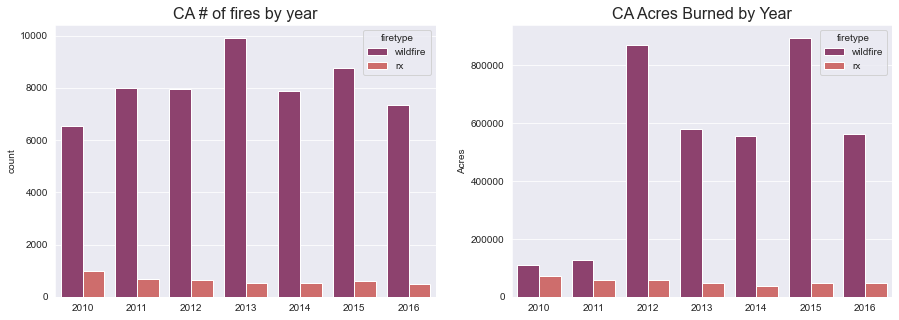

In [24]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(ax=ax[0], data=ca_vert.loc[ca_vert['metric']=='ct'], x='year', y='value', 
            hue='firetype', palette = 'flare_r')
ax[0].set_title("CA # of fires by year", size=16)
ax[0].set(xlabel='', ylabel='count');

sns.barplot(ax=ax[1], data=ca_vert.loc[ca_vert['metric']=='acre'], x='year', y='value', 
            hue='firetype', palette = 'flare_r')
ax[1].set_title('CA Acres Burned by Year', size=16)
ax[1].set(xlabel='', ylabel='Acres');


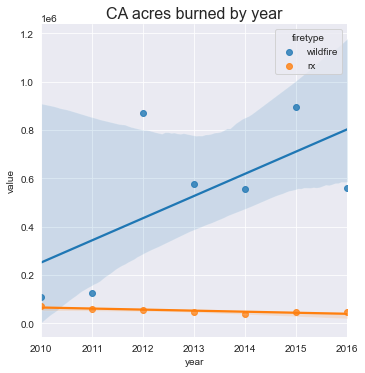

In [19]:
sns.lmplot(data=ca_vert.loc[ca_vert['metric']=='acre'],
           x='year', y='value', hue='firetype',
          legend_out=False)
plt.title('CA acres burned by year', size=16); 
#ration of terr. to # fires
#why? - droughts?? >> repurpose for all states in our data - subplots?
#is there any "convergence" btn. Rx and wildfires??
#shaded area = confidence level?

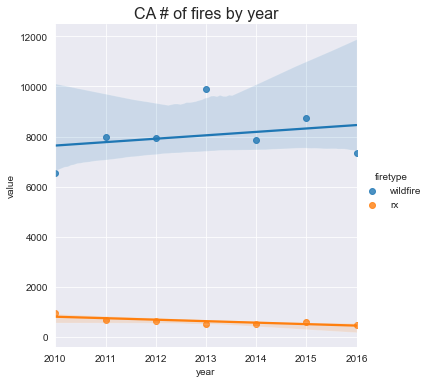

In [18]:
sns.set_style('darkgrid')
sns.lmplot(data=ca_vert.loc[ca_vert['metric']=='ct'], x='year', y='value', hue='firetype')
plt.title('CA # of fires by year', size=16);